<h1>Exercise 6 - Visualización de grafos</h1>

<h2>Objetivo</h2>

Aplicar visualización de grafos.

Comenzamos descargando los paquetes:

In [ ]:
import Pkg

paquetes = ["Graphs","GraphMakie","CairoMakie","Random","Plots"]

#Instalar y usar los paquetes
for pkg in paquetes
    # Instalación de paquetes.
    if haskey(Pkg.installed(), pkg)
        println("El paquete \"$pkg\" ya está instalado.")
    else
        println("El paquete \"$pkg\" NO está instalado.")
        Pkg.add(pkg)
    end
    #Usar el paquete en el proyecto.
    try
        @eval using $(Symbol(pkg))
        println("El paquete \"$pkg\" se ha cargado exitosamente.")
    catch e
        println("Error al cargar el paquete \"$pkg\": $e")
    end
end

El paquete "Graphs" ya está instalado.
El paquete "Graphs" se ha cargado exitosamente.
El paquete "GraphMakie" ya está instalado.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "GraphMakie" se ha cargado exitosamente.
El paquete "CairoMakie" ya está instalado.
El paquete "CairoMakie" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "Random" ya está instalado.
El paquete "Random" se ha cargado exitosamente.
El paquete "Plots" ya está instalado.
El paquete "Plots" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


Generamos un código que:
<br>
* Asigna posiciones aleatorias a los nodos en un plano 2D (coordenadas entre 0 y 1).  
<br>
* Calcula las distancias entre todos los pares de nodos.  
<br>
* Conecta nodos con una distancia menor al radius formando un grafo.  
<br>
* Se genera un grafo geométrico aleatorio con 200 nodos, un radio de conexión de 0.125, y una semilla (seed=3) para garantizar que los resultados sean reproducibles.  
<br>
* Se determina el nodo más cercano al centro del grafo usando distancia euclidiana de cada nodo.  
<br>
* Se identifica el nodo con la menor distancia al centro.  
<br>
* Cálcula de las distancias desde el nodo central:  
<br>
* Las distancias se convierten en un vector, donde cada índice corresponde a un nodo.  
<br>
* Se dibuja el grafo usando graphplot.  
<br>
* El tamaño del nodo central se resalta (más grande).  
<br>
* Los colores de los nodos reflejan sus distancias al nodo central.  
<br>
* Se añaden etiquetas opcionales con el índice de cada nodo.  
<br>
* y se da el guardado del gráfico  


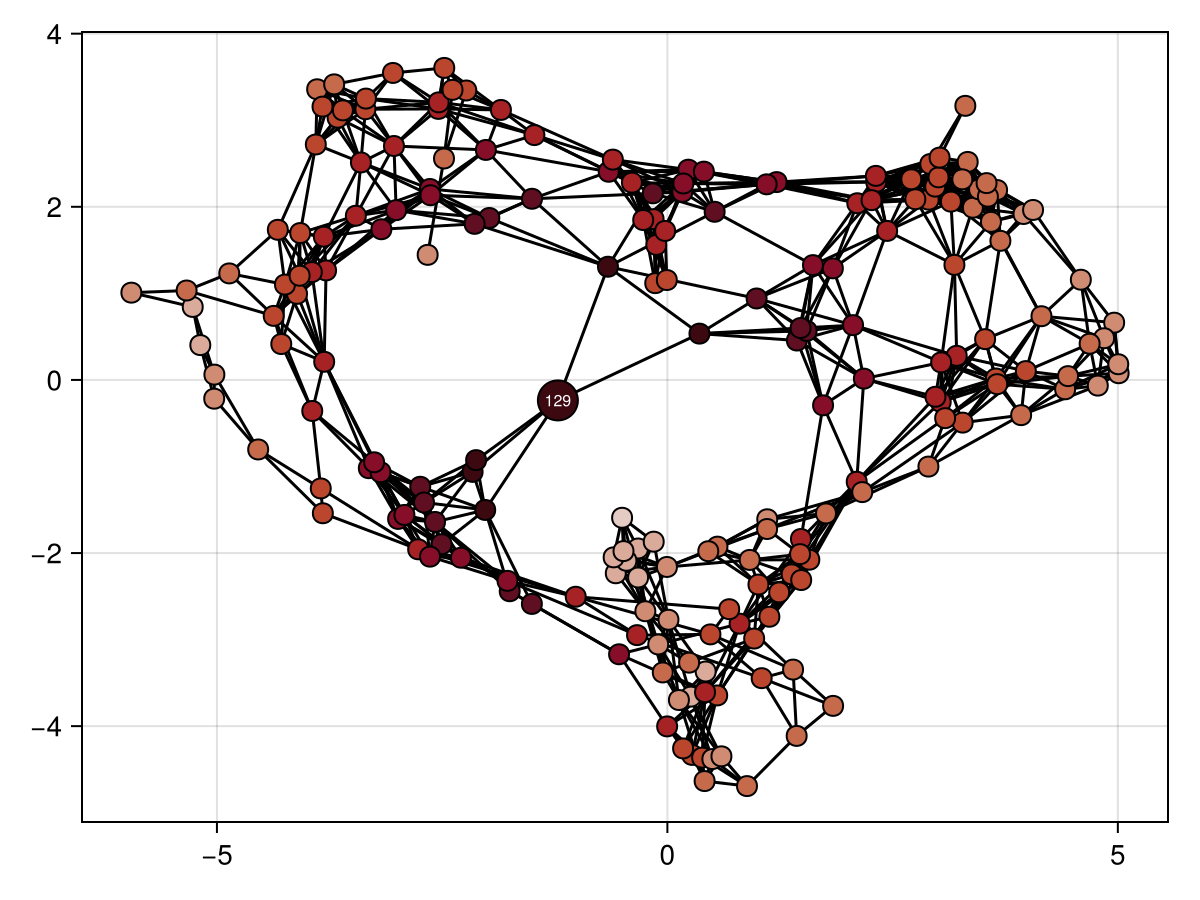

In [6]:

# Generar el grafo geométrico aleatorio
function generate_random_geometric_graph(n, radius; seed::Union{Int, Nothing} = nothing)
    # Establecer la semilla si se proporciona
    if seed !== nothing
        Random.seed!(seed)
    end

    G = SimpleGraph(n)
    positions = rand(2, n)  # Asignar posiciones aleatorias entre (0,1)
    for i in 1:n
        for j in i+1:n
            # Calcular distancia euclidiana entre los nodos
            dist = sqrt((positions[1, i] - positions[1, j])^2 + (positions[2, i] - positions[2, j])^2)
            if dist < radius
                add_edge!(G, i, j)
            end
        end
    end
    return G, positions
end

# Crear el grafo
n = 200
radius = 0.125
G, positions = generate_random_geometric_graph(n, radius,seed=3)

# Buscar el nodo más cercano al centro
dmin = Inf
ncenter = 0
for n in 1:n
    x, y = positions[:, n]
    d = (x - 0.5)^2 + (y - 0.5)^2
    if d < dmin
        ncenter = n
        dmin = d
    end
end

# Calcular las distancias desde el centro
dijkstra_result = dijkstra_shortest_paths(G, ncenter)

# Acceder a las distancias
distances = dijkstra_result.dists

# Convertir el diccionario en un vector de distancias (por nodo)
node_distances = [get(distances, i, Inf) for i in 1:n]

# Graficar el grafo con los tamaños y colores de los nodos
f, ax, g = graphplot(G;
    node_size = [x == ncenter ? 20 : 10 for x in 1:nv(G)],
    node_color = node_distances,
    ilabels_fontsize = [x == ncenter ? 8 : 0 for x in 1:n],
    ilabels = 1:n,
    ilabels_color = :white,
    node_attr = (colormap=Reverse(:amp), colorrange=(1,10))
)

#save("../fig/random_geometric_graph.png", f)
